<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>


<h2 style="text-align: center;"><b>Семинар 7. Многослойная сеть на PyTorch</b></h3>

В этом ноутбке мы научимся писать свои нейросети на фреймворке PyTorch, конкретно - рассмотрим, как написать многослойную полносвязную сеть (Fully-Connected, FC), и сравним их качество на датасете картинок MNIST.

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, строки которой - это нейроны (одна строка - один нейрон), а столбцы - веса каждого нейрона (то есть одна строка - это веса одного нейрона).

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, у второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге ***для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации***.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации).

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import torch

## Датасет
Мы будем работать с датасетом "Игрушка дьявола". Генерация и отрисовка датасета:

In [8]:
# код для генерации взят из Стэнфордсокго курса:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

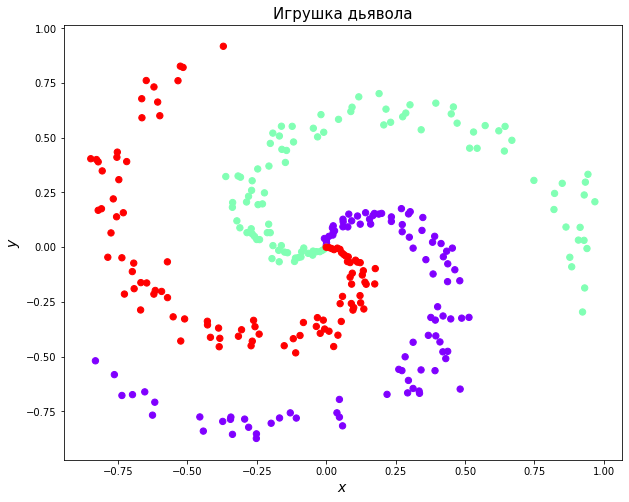

In [9]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

<h3 style="text-align: center;"><b>Многослойная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

## PyTorch для нейронных сетей

Основная абстракция для построения нейронной сети --- это torch.nn.Module. Module --- это те кирпичики, из которых мы будем складывать любую нейронную сеть. Как мы узнали на лекции, для определения модуля достаточно задать методы Forward и Backward. Базовый класс для nn.Module в PyTorch:



In [10]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
               x = F.relu(self.conv1(x))
               return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.
    


### Модуль Sequential

Основной класс в PyTorch для работы с нейронными сетями --- это  Sequential.  Sequential --- это шаблон для самой простой последовательной нейронной сети. Методы Forward и Backward заданы соответственно: мы пробрасываем выходы и градиенты через все слои, из которых состоит Module. Посмотрим, как это работает.

Не будем медлить - бахнем 100 нейронов в двуслойную нейросеть. 

In [9]:
# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Посмотрим, что у нас получилось. Пропустим мусорные данные через нашу модель методом forward.

In [11]:
print("Weight shapes:", [w.shape for w in two_layer_net.parameters()])

Weight shapes: [torch.Size([200, 2]), torch.Size([200]), torch.Size([3, 200]), torch.Size([3])]


In [63]:
print(X.shape)
print(y.shape)
print(X[:3])
print(y)

(300, 2)
(300,)
[[ 0.          0.        ]
 [-0.0008356   0.01006639]
 [ 0.00593452  0.0193107 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [12]:
# create dummy data with 3 samples and 784 features
x_batch = torch.tensor(X[:3], dtype=torch.float32)
y_batch = torch.tensor(y[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = two_layer_net(x_batch)[0]

y_predicted  # display what we've got

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.3815, 0.2452, 0.3732], grad_fn=<SelectBackward>)

## Код для генерации мини-батчей



In [13]:
from torch.autograd import Variable

In [14]:
def batch_gen(X, y, batch_size=128):
    idx = np.random.randint(X.shape[0], size=batch_size)
    #print(idx.shape)
    X_batch = X[idx]
    y_batch = y[idx]
    #my_idx = np.array([253, 29])
    #print(X[my_idx])
  
    return Variable(torch.FloatTensor(X_batch)), Variable(torch.LongTensor(y_batch))

In [15]:
batch_gen(X, y)[1].shape

torch.Size([128])

In [16]:
two_layer_net.forward(batch_gen(X,y)[0])

tensor([[0.3813, 0.2466, 0.3721],
        [0.3815, 0.2452, 0.3732],
        [0.3771, 0.2472, 0.3757],
        [0.3606, 0.2486, 0.3908],
        [0.3953, 0.2315, 0.3732],
        [0.3779, 0.2286, 0.3935],
        [0.3704, 0.2445, 0.3851],
        [0.3827, 0.2394, 0.3779],
        [0.3807, 0.2483, 0.3709],
        [0.3815, 0.2464, 0.3721],
        [0.3490, 0.2414, 0.4096],
        [0.3775, 0.2475, 0.3750],
        [0.3881, 0.2452, 0.3667],
        [0.3899, 0.2454, 0.3647],
        [0.3835, 0.2375, 0.3790],
        [0.3910, 0.2349, 0.3741],
        [0.3390, 0.2483, 0.4128],
        [0.3876, 0.2488, 0.3636],
        [0.3960, 0.2333, 0.3707],
        [0.3253, 0.2415, 0.4331],
        [0.3407, 0.2485, 0.4108],
        [0.3662, 0.2526, 0.3813],
        [0.3228, 0.2387, 0.4385],
        [0.3492, 0.2414, 0.4094],
        [0.4175, 0.2407, 0.3418],
        [0.3941, 0.2475, 0.3584],
        [0.4007, 0.2366, 0.3627],
        [0.3779, 0.2286, 0.3935],
        [0.3770, 0.2471, 0.3759],
        [0.337

Не забываем оборачивать данные (без этого градиенты не посчитать):

## Функция потерь и оптимизатор

In [19]:
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Обучение модели

In [20]:
# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
for t in range(10000):
    x_batch, y_batch = batch_gen(X, y)
    
    # forward
    y_pred = two_layer_net(x_batch)

    # loss
    loss = loss_fn(y_pred, y_batch)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

0 140.4249267578125
1 139.93667602539062
2 140.3348846435547
3 140.37966918945312
4 140.2954559326172
5 140.3933868408203
6 140.32054138183594
7 140.07437133789062
8 140.09423828125
9 140.03819274902344
10 139.81272888183594
11 140.26734924316406
12 140.5037078857422
13 140.20347595214844
14 140.05465698242188
15 140.2593536376953
16 140.21255493164062
17 140.02850341796875
18 139.56788635253906
19 139.9690399169922
20 139.85020446777344
21 139.93453979492188
22 139.69139099121094
23 139.46475219726562
24 139.81126403808594
25 139.4557647705078
26 139.49551391601562
27 139.3250732421875
28 139.1809539794922
29 139.61776733398438
30 139.96484375
31 139.3472900390625
32 139.6223907470703
33 139.6494140625
34 139.20436096191406
35 139.27796936035156
36 139.54534912109375
37 138.9212646484375
38 139.15940856933594
39 139.23367309570312
40 139.117919921875
41 139.57192993164062
42 139.0166778564453
43 138.9320526123047
44 138.8577117919922
45 139.327880859375
46 139.00926208496094
47 138.92

369 129.6416473388672
370 129.7407684326172
371 128.2374267578125
372 130.6586151123047
373 129.8157196044922
374 130.0592803955078
375 130.96075439453125
376 129.88380432128906
377 129.22994995117188
378 128.1124267578125
379 131.42176818847656
380 130.3885498046875
381 130.78195190429688
382 129.9337158203125
383 129.74928283691406
384 130.73524475097656
385 128.4066925048828
386 130.90249633789062
387 131.11636352539062
388 128.3610382080078
389 130.50181579589844
390 129.38900756835938
391 130.44564819335938
392 129.04745483398438
393 131.84011840820312
394 129.773681640625
395 129.28297424316406
396 129.77210998535156
397 128.7774200439453
398 129.55392456054688
399 131.1653594970703
400 129.72181701660156
401 128.91932678222656
402 128.98255920410156
403 128.87905883789062
404 129.69544982910156
405 130.03799438476562
406 128.40667724609375
407 130.29493713378906
408 128.57940673828125
409 129.2231903076172
410 129.63902282714844
411 129.0662841796875
412 129.8616485595703
413 12

729 123.21820831298828
730 121.14669799804688
731 122.55035400390625
732 123.82398223876953
733 118.50169372558594
734 121.50099182128906
735 125.32917022705078
736 123.13885498046875
737 121.11093139648438
738 119.26738739013672
739 123.56049346923828
740 119.4722900390625
741 125.66307830810547
742 122.67806243896484
743 119.1494369506836
744 120.32112884521484
745 122.8918228149414
746 120.84202575683594
747 119.15937805175781
748 123.52876281738281
749 120.35520935058594
750 120.7654037475586
751 124.02971649169922
752 119.94184112548828
753 120.37416076660156
754 121.27606201171875
755 122.04666137695312
756 121.40221405029297
757 122.65912628173828
758 122.73225402832031
759 123.47773742675781
760 123.04845428466797
761 119.92560577392578
762 117.95760345458984
763 124.27709197998047
764 118.92359161376953
765 122.29898834228516
766 119.35465240478516
767 119.84713745117188
768 118.11124420166016
769 121.04048156738281
770 118.08602142333984
771 120.02233123779297
772 121.9156951

1084 116.6593017578125
1085 112.10504150390625
1086 115.8769760131836
1087 120.76467895507812
1088 121.3587875366211
1089 117.92835998535156
1090 125.31526947021484
1091 115.63805389404297
1092 118.10736846923828
1093 122.06187438964844
1094 121.46721649169922
1095 116.50690460205078
1096 117.05728912353516
1097 119.83256530761719
1098 117.54935455322266
1099 119.33377838134766
1100 123.87994384765625
1101 121.16188049316406
1102 120.20887756347656
1103 118.33824920654297
1104 116.35227966308594
1105 117.41693115234375
1106 117.71951293945312
1107 116.65064239501953
1108 111.72862243652344
1109 119.93815612792969
1110 120.68130493164062
1111 122.44493865966797
1112 113.20640563964844
1113 117.89105987548828
1114 117.49329376220703
1115 119.69048309326172
1116 117.85690307617188
1117 120.3211441040039
1118 119.80522918701172
1119 118.16050720214844
1120 118.86608123779297
1121 120.33039093017578
1122 119.1747817993164
1123 117.2015151977539
1124 118.38075256347656
1125 122.3699569702148

1428 114.17061614990234
1429 115.92588806152344
1430 114.75474548339844
1431 117.5418930053711
1432 116.4067611694336
1433 114.98410034179688
1434 115.72018432617188
1435 120.37006378173828
1436 120.00150299072266
1437 110.96979522705078
1438 114.51105499267578
1439 113.82623291015625
1440 117.21084594726562
1441 122.38455963134766
1442 118.10330963134766
1443 119.60218048095703
1444 115.48047637939453
1445 115.98182678222656
1446 116.25605773925781
1447 115.99478149414062
1448 116.82646179199219
1449 117.57513427734375
1450 111.88238525390625
1451 120.20561981201172
1452 116.22512817382812
1453 114.94778442382812
1454 112.23348999023438
1455 113.34142303466797
1456 118.22745513916016
1457 119.51764678955078
1458 116.61251068115234
1459 116.37236022949219
1460 115.4184799194336
1461 120.47801208496094
1462 120.62305450439453
1463 117.3231201171875
1464 114.02690124511719
1465 115.73058319091797
1466 112.04952239990234
1467 113.92369842529297
1468 114.7890853881836
1469 115.147254943847

1772 115.5286865234375
1773 117.35993194580078
1774 112.35688018798828
1775 112.96406555175781
1776 114.43956756591797
1777 111.74491119384766
1778 112.91275787353516
1779 116.65216064453125
1780 112.62847900390625
1781 117.31098937988281
1782 119.91199493408203
1783 117.26416778564453
1784 110.9876708984375
1785 115.79312896728516
1786 121.01478576660156
1787 117.89351654052734
1788 118.08566284179688
1789 120.16414642333984
1790 120.60377502441406
1791 117.17481994628906
1792 119.26477813720703
1793 117.65545654296875
1794 113.87792205810547
1795 111.05453491210938
1796 118.00017547607422
1797 114.49948120117188
1798 115.4500961303711
1799 115.09026336669922
1800 116.82195281982422
1801 115.85087585449219
1802 110.32239532470703
1803 110.0794906616211
1804 115.0114517211914
1805 113.61714172363281
1806 114.50862121582031
1807 118.0684814453125
1808 109.06861877441406
1809 111.0125503540039
1810 117.03877258300781
1811 113.07278442382812
1812 117.75455474853516
1813 119.71757507324219

2117 118.40171813964844
2118 114.48631286621094
2119 112.53927612304688
2120 113.17160034179688
2121 118.11833190917969
2122 115.5852279663086
2123 115.4832992553711
2124 109.77827453613281
2125 113.46533203125
2126 113.6204605102539
2127 116.3277359008789
2128 112.80707550048828
2129 114.45149993896484
2130 107.3509292602539
2131 115.3559341430664
2132 115.3821792602539
2133 113.44355010986328
2134 115.7787857055664
2135 112.49810791015625
2136 116.75001525878906
2137 113.84716796875
2138 105.61994934082031
2139 111.84552001953125
2140 115.07176208496094
2141 114.32933807373047
2142 116.93092346191406
2143 108.31700134277344
2144 115.11725616455078
2145 115.7190170288086
2146 115.99851989746094
2147 113.99873352050781
2148 115.24767303466797
2149 117.16519165039062
2150 114.69585418701172
2151 116.75765228271484
2152 111.45487213134766
2153 116.3622055053711
2154 113.65908813476562
2155 116.25672912597656
2156 110.85908508300781
2157 115.57270812988281
2158 105.08709716796875
2159 111

2462 111.51921844482422
2463 116.4465560913086
2464 109.09073638916016
2465 108.42584991455078
2466 110.45736694335938
2467 116.1866455078125
2468 111.36825561523438
2469 106.99364471435547
2470 107.43907928466797
2471 116.43807220458984
2472 109.23918151855469
2473 113.67919921875
2474 117.33277130126953
2475 112.88311767578125
2476 112.86721801757812
2477 109.36543273925781
2478 113.54264068603516
2479 111.95854187011719
2480 113.0280532836914
2481 107.37286376953125
2482 113.49694061279297
2483 113.40766906738281
2484 116.52983856201172
2485 113.82450866699219
2486 109.6015853881836
2487 117.18724060058594
2488 113.01091766357422
2489 115.53953552246094
2490 105.33676147460938
2491 112.70164489746094
2492 117.52275085449219
2493 114.20748138427734
2494 109.06693267822266
2495 113.5829849243164
2496 112.31734466552734
2497 113.17317962646484
2498 113.24917602539062
2499 109.56340789794922
2500 110.99237823486328
2501 109.51661682128906
2502 114.16722106933594
2503 108.88101959228516


2806 112.23085021972656
2807 113.38592529296875
2808 110.40251159667969
2809 109.06926727294922
2810 104.03923797607422
2811 106.96498107910156
2812 116.28942108154297
2813 104.96979522705078
2814 113.53170776367188
2815 107.00263214111328
2816 111.87789916992188
2817 113.3438491821289
2818 107.85649871826172
2819 113.07762908935547
2820 108.6070327758789
2821 111.17125701904297
2822 111.40431213378906
2823 111.5224838256836
2824 108.58128356933594
2825 110.36288452148438
2826 113.6116943359375
2827 113.28473663330078
2828 112.06945037841797
2829 114.649169921875
2830 110.83096313476562
2831 114.75845336914062
2832 110.89177703857422
2833 110.64759063720703
2834 111.3032455444336
2835 109.80062103271484
2836 105.91110229492188
2837 107.81886291503906
2838 114.80293273925781
2839 112.6282958984375
2840 111.00537109375
2841 106.26526641845703
2842 111.43578338623047
2843 111.36933898925781
2844 112.5544662475586
2845 114.66535949707031
2846 112.80986785888672
2847 114.31803894042969
2848

3150 105.38142395019531
3151 107.1218490600586
3152 113.21581268310547
3153 106.64373779296875
3154 106.4482650756836
3155 106.32854461669922
3156 110.34895324707031
3157 108.92154693603516
3158 113.35005950927734
3159 110.40530395507812
3160 116.9154052734375
3161 109.81461334228516
3162 109.20223236083984
3163 109.97412109375
3164 111.9910659790039
3165 109.43789672851562
3166 105.1998291015625
3167 112.66321563720703
3168 104.21949005126953
3169 109.0299301147461
3170 114.03533172607422
3171 109.12660217285156
3172 112.42826843261719
3173 110.64954376220703
3174 111.6207504272461
3175 107.58753204345703
3176 110.45565795898438
3177 110.63672637939453
3178 109.76397705078125
3179 111.74774932861328
3180 114.33772277832031
3181 109.344970703125
3182 109.09123992919922
3183 108.5985336303711
3184 111.2520980834961
3185 110.31782531738281
3186 106.95124053955078
3187 112.63164520263672
3188 106.02631378173828
3189 109.46186828613281
3190 106.0782241821289
3191 110.92446899414062
3192 10

3495 105.81842041015625
3496 108.43812561035156
3497 113.1054916381836
3498 106.49452209472656
3499 107.38660430908203
3500 110.27528381347656
3501 111.36439514160156
3502 105.52979278564453
3503 107.44051361083984
3504 107.75370025634766
3505 111.26486206054688
3506 107.81816101074219
3507 109.20268249511719
3508 105.71627044677734
3509 109.50702667236328
3510 102.84009552001953
3511 104.99421691894531
3512 105.26081085205078
3513 113.08470916748047
3514 103.22210693359375
3515 106.16629791259766
3516 105.53528594970703
3517 106.608642578125
3518 109.0152359008789
3519 108.17848205566406
3520 109.18843841552734
3521 105.86158752441406
3522 110.67993927001953
3523 107.55919647216797
3524 108.37028503417969
3525 114.54891204833984
3526 106.17951965332031
3527 103.56651306152344
3528 116.15074157714844
3529 106.80988311767578
3530 105.81680297851562
3531 109.55760955810547
3532 112.40196228027344
3533 100.98436737060547
3534 106.94227600097656
3535 106.77140045166016
3536 106.86181640625

3839 107.0027084350586
3840 104.50541687011719
3841 104.2882308959961
3842 108.60714721679688
3843 106.04261016845703
3844 108.52930450439453
3845 104.63088989257812
3846 107.19159698486328
3847 109.6539077758789
3848 107.11681365966797
3849 106.94889831542969
3850 110.17720794677734
3851 107.48335266113281
3852 105.82183074951172
3853 111.36772918701172
3854 105.53599548339844
3855 103.0704345703125
3856 101.08049774169922
3857 109.85986328125
3858 102.15789794921875
3859 106.31980895996094
3860 108.0262451171875
3861 111.1551284790039
3862 100.38231658935547
3863 105.08429718017578
3864 104.66437530517578
3865 111.660400390625
3866 110.24195098876953
3867 103.36670684814453
3868 105.78984069824219
3869 104.51712799072266
3870 105.46320343017578
3871 106.48931121826172
3872 107.40338134765625
3873 107.92085266113281
3874 109.6076889038086
3875 103.81539154052734
3876 106.00231170654297
3877 108.93143463134766
3878 105.8857421875
3879 109.0238037109375
3880 102.94645690917969
3881 103.

4184 104.45046997070312
4185 100.41410827636719
4186 101.25104522705078
4187 107.04519653320312
4188 102.75785827636719
4189 102.78218841552734
4190 98.35520935058594
4191 101.82207489013672
4192 107.32615661621094
4193 103.43890380859375
4194 103.37298583984375
4195 100.9051513671875
4196 103.5488052368164
4197 103.50717163085938
4198 107.53739166259766
4199 106.49718475341797
4200 103.21464538574219
4201 105.05693054199219
4202 102.6280746459961
4203 105.09541320800781
4204 103.9105453491211
4205 107.70133972167969
4206 103.65496063232422
4207 101.26563262939453
4208 99.28905487060547
4209 101.5271224975586
4210 101.07852935791016
4211 106.84224700927734
4212 102.82423400878906
4213 101.2754135131836
4214 102.41533660888672
4215 104.90545654296875
4216 103.51842498779297
4217 103.20769500732422
4218 106.54354858398438
4219 103.08843994140625
4220 101.77277374267578
4221 100.29257202148438
4222 100.18229675292969
4223 101.12744140625
4224 103.44315338134766
4225 108.33528900146484
422

4531 109.17412567138672
4532 98.65032958984375
4533 98.31046295166016
4534 97.8066635131836
4535 100.49215698242188
4536 102.17518615722656
4537 99.58385467529297
4538 105.16263580322266
4539 99.27587127685547
4540 101.32906341552734
4541 103.02880096435547
4542 98.62284088134766
4543 102.03548431396484
4544 100.36257934570312
4545 103.37469482421875
4546 96.75440216064453
4547 102.79039001464844
4548 98.39176940917969
4549 101.01526641845703
4550 98.8474349975586
4551 100.68476867675781
4552 101.0584945678711
4553 99.6541976928711
4554 105.38446807861328
4555 100.95264434814453
4556 101.68125915527344
4557 102.51630401611328
4558 100.41724395751953
4559 102.67669677734375
4560 104.82552337646484
4561 103.44349670410156
4562 101.90996551513672
4563 101.46719360351562
4564 96.33724975585938
4565 102.77098083496094
4566 102.61172485351562
4567 105.7379150390625
4568 99.75151824951172
4569 104.74365997314453
4570 102.00434112548828
4571 99.05973052978516
4572 101.85479736328125
4573 107.7

4881 101.96760559082031
4882 96.57760620117188
4883 98.45355987548828
4884 95.24503326416016
4885 100.21076965332031
4886 100.1798324584961
4887 104.11610412597656
4888 101.63197326660156
4889 100.04011535644531
4890 98.89903259277344
4891 100.11851501464844
4892 102.07376098632812
4893 104.4875259399414
4894 100.90219116210938
4895 97.43926239013672
4896 94.6157455444336
4897 94.34148406982422
4898 99.17143249511719
4899 95.64664459228516
4900 101.37315368652344
4901 104.35519409179688
4902 99.84318542480469
4903 96.89729309082031
4904 102.68019104003906
4905 98.8946304321289
4906 95.48567199707031
4907 99.86341094970703
4908 99.1386947631836
4909 97.2808609008789
4910 98.51188659667969
4911 98.49308013916016
4912 99.6202621459961
4913 97.08950805664062
4914 105.43666076660156
4915 97.9065933227539
4916 100.29588317871094
4917 103.28260040283203
4918 99.97896575927734
4919 98.7957763671875
4920 97.98175048828125
4921 99.24242401123047
4922 102.25362396240234
4923 92.97469329833984
492

5237 96.65872955322266
5238 92.1006851196289
5239 94.13665008544922
5240 101.16922760009766
5241 98.0556411743164
5242 101.44541931152344
5243 97.84190368652344
5244 98.23681640625
5245 93.97063446044922
5246 94.02898406982422
5247 97.20880126953125
5248 98.84741973876953
5249 99.86378479003906
5250 100.22586059570312
5251 98.50593566894531
5252 97.65072631835938
5253 99.01673126220703
5254 96.73285675048828
5255 100.16543579101562
5256 95.74176788330078
5257 99.63330841064453
5258 94.34801483154297
5259 94.6796875
5260 101.16039276123047
5261 92.44677734375
5262 91.93687438964844
5263 98.26222229003906
5264 95.63066864013672
5265 95.65904998779297
5266 97.42044067382812
5267 92.89142608642578
5268 93.42298126220703
5269 98.08319091796875
5270 96.95089721679688
5271 103.22930908203125
5272 98.80042266845703
5273 95.09774780273438
5274 97.75944519042969
5275 93.32206726074219
5276 96.34378814697266
5277 94.93949127197266
5278 94.65157318115234
5279 95.12629699707031
5280 96.060432434082

5596 96.55311584472656
5597 93.03852844238281
5598 91.76911163330078
5599 95.30447387695312
5600 95.81979370117188
5601 97.754638671875
5602 88.9865951538086
5603 93.72708129882812
5604 94.71379852294922
5605 97.96165466308594
5606 95.15992736816406
5607 97.17354583740234
5608 96.28221893310547
5609 93.623046875
5610 92.71206665039062
5611 95.29895782470703
5612 93.66912841796875
5613 97.03369903564453
5614 92.31011962890625
5615 96.94254302978516
5616 94.0890121459961
5617 98.44488525390625
5618 99.6190185546875
5619 94.36384582519531
5620 95.62188720703125
5621 92.94536590576172
5622 98.78012084960938
5623 93.82340240478516
5624 90.20497131347656
5625 95.15788269042969
5626 95.78055572509766
5627 94.16870880126953
5628 94.49340057373047
5629 95.5500717163086
5630 97.2464599609375
5631 98.68682861328125
5632 98.91800689697266
5633 93.80390167236328
5634 97.74000549316406
5635 96.42691040039062
5636 94.60767364501953
5637 94.50068664550781
5638 93.54680633544922
5639 94.65708923339844


5956 92.04606628417969
5957 92.63056182861328
5958 89.636962890625
5959 95.20410919189453
5960 93.33546447753906
5961 89.83390045166016
5962 92.04396057128906
5963 94.56463623046875
5964 96.42406463623047
5965 93.80084228515625
5966 94.72063446044922
5967 92.5886001586914
5968 89.41072845458984
5969 91.4933090209961
5970 93.05831146240234
5971 94.60589599609375
5972 91.9942398071289
5973 95.0135269165039
5974 93.60380554199219
5975 89.80947875976562
5976 90.59983825683594
5977 92.91301727294922
5978 89.8025894165039
5979 93.9125747680664
5980 95.76490783691406
5981 93.79058074951172
5982 94.7894515991211
5983 95.03404235839844
5984 92.1912841796875
5985 93.31123352050781
5986 97.75015258789062
5987 94.4451904296875
5988 90.46710205078125
5989 94.24456024169922
5990 95.52539825439453
5991 97.38639068603516
5992 94.60368347167969
5993 90.25647735595703
5994 95.49628448486328
5995 94.88245391845703
5996 93.62625122070312
5997 93.60026550292969
5998 93.80377960205078
5999 94.7195053100586


6316 89.78397369384766
6317 97.29578399658203
6318 88.64688110351562
6319 93.93988800048828
6320 92.27242279052734
6321 89.71263122558594
6322 89.33200073242188
6323 93.11396026611328
6324 93.95988464355469
6325 91.86392211914062
6326 92.9706039428711
6327 95.61858367919922
6328 87.40943908691406
6329 92.45846557617188
6330 92.85662078857422
6331 90.60791015625
6332 91.12920379638672
6333 90.9002456665039
6334 91.84778594970703
6335 90.41014099121094
6336 94.37419891357422
6337 92.1523666381836
6338 91.61387634277344
6339 89.22508239746094
6340 93.99147033691406
6341 92.94944763183594
6342 93.35464477539062
6343 91.31585693359375
6344 93.68472290039062
6345 92.13744354248047
6346 93.64432525634766
6347 88.54570007324219
6348 91.11521911621094
6349 90.66505432128906
6350 89.05097198486328
6351 89.48760986328125
6352 92.35365295410156
6353 90.46612548828125
6354 89.8528823852539
6355 96.32768249511719
6356 89.65701293945312
6357 87.85662841796875
6358 93.77147674560547
6359 91.2958526611

6675 89.3389892578125
6676 89.90465545654297
6677 92.71157836914062
6678 91.12745666503906
6679 96.76447296142578
6680 90.02066040039062
6681 89.75322723388672
6682 92.15509033203125
6683 90.46300506591797
6684 90.76514434814453
6685 89.67960357666016
6686 91.86067962646484
6687 86.32161712646484
6688 87.15003204345703
6689 91.04722595214844
6690 88.27070617675781
6691 88.82850646972656
6692 91.46623229980469
6693 86.00845336914062
6694 91.00318908691406
6695 90.46705627441406
6696 90.26078033447266
6697 90.0091552734375
6698 89.81674194335938
6699 90.61235046386719
6700 85.9747085571289
6701 88.56731414794922
6702 88.71183013916016
6703 89.06705474853516
6704 88.3569107055664
6705 86.43414306640625
6706 90.39096069335938
6707 92.66828155517578
6708 86.31468200683594
6709 88.67613220214844
6710 87.90479278564453
6711 92.79683685302734
6712 88.36128234863281
6713 97.1693115234375
6714 90.66450500488281
6715 87.03567504882812
6716 90.33599853515625
6717 89.91891479492188
6718 93.95873260

7035 85.065673828125
7036 88.51971435546875
7037 89.94576263427734
7038 88.00910949707031
7039 88.35800170898438
7040 89.53119659423828
7041 88.06346130371094
7042 86.80213928222656
7043 91.46039581298828
7044 91.14266204833984
7045 87.87699890136719
7046 89.36743927001953
7047 90.79322052001953
7048 88.48638916015625
7049 89.11782836914062
7050 88.74173736572266
7051 90.40113830566406
7052 88.80503845214844
7053 90.93435668945312
7054 89.4026870727539
7055 87.69454193115234
7056 90.68659973144531
7057 89.4068832397461
7058 85.7549057006836
7059 85.33882904052734
7060 90.82801818847656
7061 89.43737030029297
7062 87.3944091796875
7063 85.71842956542969
7064 90.14046478271484
7065 89.96421813964844
7066 92.22400665283203
7067 84.58318328857422
7068 86.77096557617188
7069 88.31758117675781
7070 89.47782897949219
7071 87.32669067382812
7072 90.92237854003906
7073 88.00048065185547
7074 87.8093490600586
7075 91.63018798828125
7076 90.27381896972656
7077 86.71611022949219
7078 90.1253433227

7395 87.30854797363281
7396 88.62397766113281
7397 86.89704132080078
7398 86.65413665771484
7399 89.59628295898438
7400 86.48181915283203
7401 88.6935806274414
7402 89.91909790039062
7403 86.9341812133789
7404 86.67733001708984
7405 90.30467224121094
7406 84.81575012207031
7407 89.76497650146484
7408 85.94700622558594
7409 88.35240173339844
7410 84.85553741455078
7411 87.03236389160156
7412 87.19602966308594
7413 88.02979278564453
7414 87.7943344116211
7415 86.94121551513672
7416 87.94219207763672
7417 88.30625915527344
7418 87.60717010498047
7419 86.79254150390625
7420 91.51040649414062
7421 86.79110717773438
7422 85.42479705810547
7423 88.9226303100586
7424 88.41593933105469
7425 88.84635925292969
7426 85.3625717163086
7427 88.74596405029297
7428 89.81489562988281
7429 86.6755599975586
7430 87.23114013671875
7431 87.20913696289062
7432 88.1452865600586
7433 86.3482894897461
7434 91.31810760498047
7435 90.42798614501953
7436 86.99054718017578
7437 88.19168090820312
7438 88.39411163330

7755 83.04988861083984
7756 88.66814422607422
7757 86.69568634033203
7758 85.90164947509766
7759 89.75675964355469
7760 84.99417114257812
7761 84.40934753417969
7762 85.81856536865234
7763 87.9510269165039
7764 86.21400451660156
7765 88.3864517211914
7766 88.23207092285156
7767 87.99736785888672
7768 85.07453918457031
7769 86.61260986328125
7770 86.25025177001953
7771 88.16722106933594
7772 86.11766815185547
7773 85.10810089111328
7774 90.04706573486328
7775 85.78189086914062
7776 86.16549682617188
7777 88.31944274902344
7778 86.0804443359375
7779 88.07377624511719
7780 87.1434097290039
7781 89.19384002685547
7782 86.43035888671875
7783 85.6478271484375
7784 86.00792694091797
7785 85.59521484375
7786 90.78128814697266
7787 87.94317626953125
7788 85.08280181884766
7789 87.58563995361328
7790 86.48609161376953
7791 88.46226501464844
7792 84.6117172241211
7793 86.69562530517578
7794 85.58981323242188
7795 87.1556396484375
7796 86.63309478759766
7797 86.54737854003906
7798 82.4099502563476

8114 85.67314910888672
8115 85.30241394042969
8116 87.10138702392578
8117 86.49813842773438
8118 85.0077896118164
8119 89.01741790771484
8120 86.91998291015625
8121 84.74222564697266
8122 86.33676147460938
8123 84.33039093017578
8124 84.71907043457031
8125 87.70625305175781
8126 84.86323547363281
8127 85.9738540649414
8128 86.8595199584961
8129 84.59708404541016
8130 82.7560806274414
8131 82.87049102783203
8132 89.0131607055664
8133 83.02191925048828
8134 87.09099578857422
8135 86.07365417480469
8136 86.32875061035156
8137 84.29022979736328
8138 84.90789794921875
8139 85.34065246582031
8140 82.84262084960938
8141 86.49221801757812
8142 87.23278045654297
8143 84.06236267089844
8144 85.99657440185547
8145 88.95057678222656
8146 86.20112609863281
8147 86.51876831054688
8148 84.22740173339844
8149 85.08873748779297
8150 85.5551528930664
8151 86.15800476074219
8152 82.28790283203125
8153 85.6518325805664
8154 84.36914825439453
8155 83.97899627685547
8156 86.46382904052734
8157 88.6454696655

8474 88.02983856201172
8475 86.51953125
8476 88.0382308959961
8477 82.19110870361328
8478 83.60821533203125
8479 86.1288070678711
8480 90.2452163696289
8481 88.5518569946289
8482 84.92756652832031
8483 83.16897583007812
8484 84.16001892089844
8485 81.48958587646484
8486 85.71864318847656
8487 81.95787048339844
8488 80.43156433105469
8489 87.29441833496094
8490 87.242919921875
8491 83.6903305053711
8492 84.77586364746094
8493 85.60704040527344
8494 85.39715576171875
8495 82.64225006103516
8496 85.56572723388672
8497 84.5492935180664
8498 82.07093048095703
8499 84.78516387939453
8500 83.73514556884766
8501 85.4109115600586
8502 83.0689468383789
8503 86.48967742919922
8504 85.27592468261719
8505 83.69825744628906
8506 82.5440673828125
8507 82.74121856689453
8508 82.81202697753906
8509 81.76709747314453
8510 83.64153289794922
8511 85.56574249267578
8512 81.84192657470703
8513 85.78099060058594
8514 84.50270080566406
8515 83.50105285644531
8516 85.19243621826172
8517 82.75494384765625
8518 

8834 86.19763946533203
8835 83.86968994140625
8836 80.62518310546875
8837 81.45877838134766
8838 85.09153747558594
8839 82.88468170166016
8840 82.32830810546875
8841 84.70962524414062
8842 85.64534759521484
8843 83.40779113769531
8844 86.67263793945312
8845 81.25728607177734
8846 82.40061950683594
8847 85.33563232421875
8848 84.12626647949219
8849 82.49900817871094
8850 82.282958984375
8851 82.4159164428711
8852 85.10665130615234
8853 84.37287139892578
8854 83.6959457397461
8855 83.25521850585938
8856 85.903564453125
8857 84.93669128417969
8858 85.527099609375
8859 81.99226379394531
8860 81.89498901367188
8861 85.77338409423828
8862 84.74618530273438
8863 82.22281646728516
8864 81.28096771240234
8865 83.70502471923828
8866 82.60055541992188
8867 84.14861297607422
8868 82.02984619140625
8869 85.1395492553711
8870 86.25493621826172
8871 84.05196380615234
8872 82.15724182128906
8873 83.64623260498047
8874 82.25485229492188
8875 85.05535125732422
8876 81.82990264892578
8877 83.651679992675

9194 83.623291015625
9195 85.06230163574219
9196 82.02471160888672
9197 84.6397705078125
9198 84.57160186767578
9199 84.59846496582031
9200 80.65213012695312
9201 84.77779388427734
9202 82.21339416503906
9203 84.69876098632812
9204 81.01834869384766
9205 83.71739196777344
9206 83.81417083740234
9207 85.14785766601562
9208 82.90882110595703
9209 79.8332290649414
9210 84.61811828613281
9211 80.55422973632812
9212 82.80280303955078
9213 83.66986083984375
9214 84.96099853515625
9215 82.8666000366211
9216 82.80228424072266
9217 83.84493255615234
9218 80.91316986083984
9219 84.77767181396484
9220 84.49480438232422
9221 84.51055908203125
9222 84.32613372802734
9223 82.96041870117188
9224 83.23609924316406
9225 84.45145416259766
9226 81.58221435546875
9227 80.28621673583984
9228 83.07023620605469
9229 82.6112289428711
9230 82.89996337890625
9231 82.97949981689453
9232 82.702880859375
9233 83.28375244140625
9234 81.10881042480469
9235 78.67572784423828
9236 84.12297058105469
9237 82.79631042480

9554 85.0184097290039
9555 82.10282135009766
9556 81.3580551147461
9557 83.19367980957031
9558 82.27476501464844
9559 81.24969482421875
9560 82.5821533203125
9561 84.19649505615234
9562 81.95140838623047
9563 85.51742553710938
9564 82.64701080322266
9565 83.69816589355469
9566 81.24573516845703
9567 84.2671890258789
9568 83.10868835449219
9569 80.55072784423828
9570 83.94718933105469
9571 83.53396606445312
9572 81.09040832519531
9573 86.06678771972656
9574 84.17330169677734
9575 82.41427612304688
9576 82.08438873291016
9577 84.42306518554688
9578 80.75313568115234
9579 79.92113494873047
9580 82.03282165527344
9581 85.59508514404297
9582 80.97809600830078
9583 83.25459289550781
9584 80.88636779785156
9585 79.82135772705078
9586 81.73265075683594
9587 86.0676040649414
9588 82.04145812988281
9589 82.29878997802734
9590 84.29068756103516
9591 80.1862564086914
9592 81.81683349609375
9593 80.37897491455078
9594 81.34851837158203
9595 80.4755859375
9596 82.42239379882812
9597 82.2770919799804

9913 80.7551040649414
9914 82.00982666015625
9915 81.48571014404297
9916 83.15924835205078
9917 81.52236938476562
9918 82.79705810546875
9919 83.45332336425781
9920 81.51734161376953
9921 81.8038330078125
9922 80.37035369873047
9923 80.617431640625
9924 81.34605407714844
9925 79.82334899902344
9926 82.0662841796875
9927 82.11659240722656
9928 80.72084045410156
9929 81.58744812011719
9930 81.40412139892578
9931 82.16695404052734
9932 82.94992065429688
9933 82.32720184326172
9934 85.12112426757812
9935 82.73873138427734
9936 81.22974395751953
9937 83.96791076660156
9938 83.20540618896484
9939 80.34376525878906
9940 81.68609619140625
9941 81.59649658203125
9942 82.06224060058594
9943 82.05404663085938
9944 78.6791000366211
9945 83.02186584472656
9946 85.35497283935547
9947 82.20005798339844
9948 82.65565490722656
9949 79.8445816040039
9950 79.66681671142578
9951 81.94239807128906
9952 82.67860412597656
9953 79.68858337402344
9954 80.73281860351562
9955 84.71016693115234
9956 79.7985610961

**Обратите внимание:** несмотря на то, что это задача 3-х классовой классификации и столбец $y$ нужно по-хорошему кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало. Вывод - PyTorch сам делает OneHot в таком случае.

Проверим, насколько хороша наша сеть из 100 нейронов:

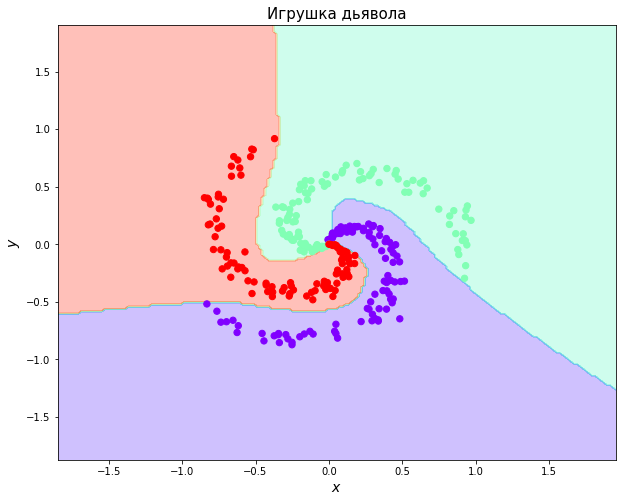

In [21]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Качество не очень. Как же так, ведь мы использовали 100 нейронов? Разве их мало?

---

### Задача 2

Улучшите сеть (помните про вещи, которые можно менять (см. Компоненты нейросети)). Экспериментируйте, в этом **вся суть deep learning** (и в том, чтобы рано или поздно сетка научилась экспериментировать за Вас :)

In [18]:
# Ваш код здесь (можно (и нужно) создавать больше ячеек)

# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 200, 3

# Use the nn package to define our model and loss function.
# this is already 3-layer NN, so, the name is not actual :)
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Несколько советов о том, как строить нейросети. Код выполнен на фреймворке Keras, но, кажется, он довольно интуитивно понятен.

* __Задача:__ Предсказать цену дома в $mil
* __Вход:__ 39 признаков этого дома

In [1]:
import tensorflow.keras as keras
#import keras.layers as L
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dense


model = keras.models.Sequential()
model.add(InputLayer([39]))
model.add(BatchNormalization())
model.add(Dense(128, kernel_initializer=keras.initializers.zeros()))

model.add(Dense(128, kernel_initializer=keras.initializers.zeros()))

model.add(Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

W1206 02:48:22.724087  6572 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [3]:
model = keras.models.Sequential()
model.add(InputLayer([39]))
model.add(BatchNormalization()) #<- можно просто нормализовать входы 
model.add(Dense(128, kernel_initializer=keras.initializers.zeros())) #<-инициализация нулями
model.add(Dense(128, kernel_initializer=keras.initializers.zeros())) #<-
model.add(Dense(1)) #<- три линейных слоя подряд ни к чему не приведут

model.compile(optimizer='sgd', loss='mean_squared_error') 

In [4]:
model = keras.models.Sequential()
model.add(InputLayer([39]))
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

* __Задача:__ Распознать рукописную цифру (0-9)
* __Вход:__ картинка 28 x 28 пикселей (ч/б)

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1)) # < хороший, годный дропаут
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))
# ^ не стоит dropout-ить вероятности на выходе, рискуете получить бесконечный лосс
model.compile(optimizer='rmsprop', loss='mean_squared_error')
# ^ обучать классификацию по квадратичной ошибке можно, но... это безбожно

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))
model.add(L.Dense(10))
model.add(L.Activation('softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*